<b><font size=5>PROBLEM1 2.50</font></b>

In [1]:
0.98/(0.98+999.99)

0.0009790503211884471

<b><font size=5>PROBLEM2 2.59</font></b>

In [4]:
print(1e-6/0.8e-3)
print(512*0.1e-6/0.8e-3)

0.0012499999999999998
0.06399999999999999


![pic_dog](./note.jpg)

<b><font size=5>PROJECT1</font></b>

/var/folders/gy/w97520_d2yl89zbz8r65qws40000gn/T/ipykernel_26283/1593667355.py:24: RuntimeWarning: divide by zero encountered in log
  c4 = np.log(np.abs(fshift*mask))  # 滤波操作


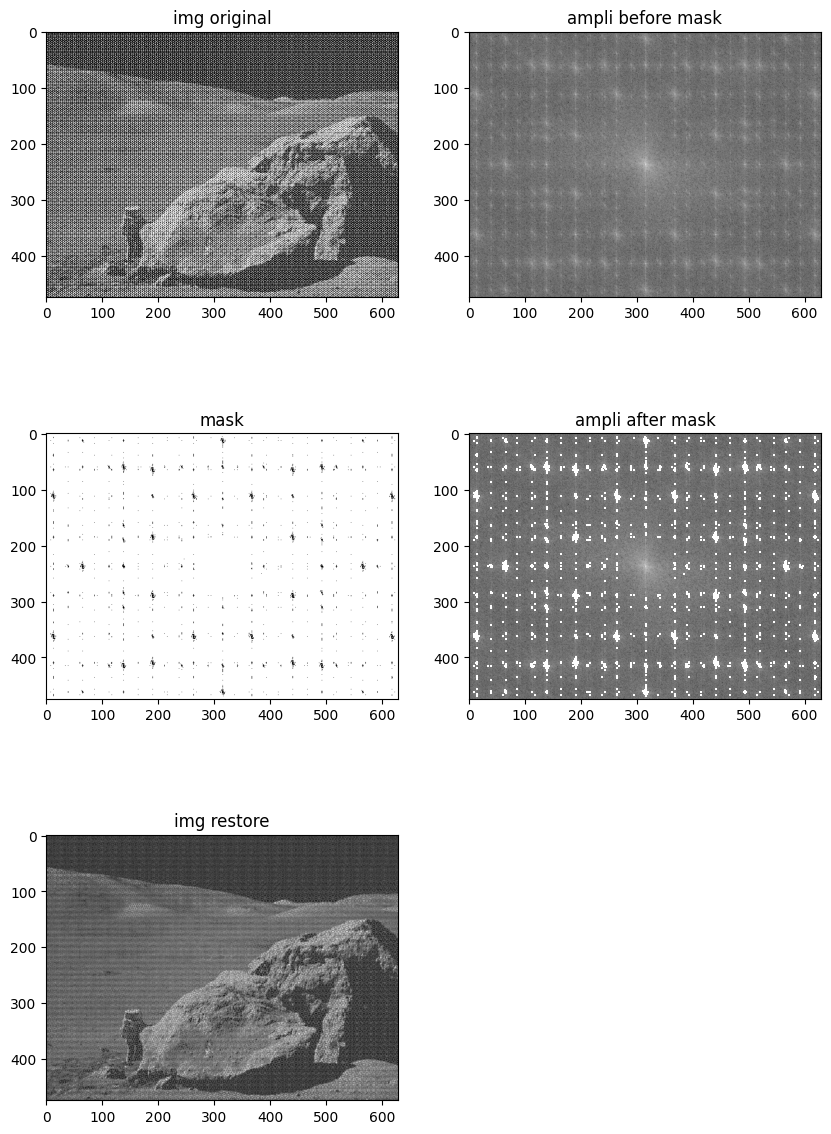

In [1]:
# 傅立叶变换 相应操作
# 得到频域上的图像，其幅值、相位
# 变换再逆变换得到原图
%reset -f
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
%clear
img = cv2.imread('apollo 17_boulder_noisy.tif', 0)  # 直接读为灰度图像
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# 取绝对值.：将复数变化成实数
# 取对数的目的为了将数据变化到较小的范围（比如0-255）
c1 = np.log(np.abs(f))  # 频域后图像的振幅信息
c2 = np.log(np.abs(fshift))  # 中心化操作

mask=np.where(c2>11,0,1)
for i in range(187,287):
    for j in range(265,365):
        mask[i][j]=1

c3 = np.abs(mask)  # 滤波器
c4 = np.log(np.abs(fshift*mask))  # 滤波操作

ph_f = np.angle(f)  # 图像上每个像素点对应的相位图
ph_fshift = np.angle(fshift)  # 中心化操作

# 逆变换
f0shift = np.fft.ifftshift(fshift*mask)
img_back = np.fft.ifft2(f0shift)
img_back = np.abs(img_back)  # 出来的是复数，无法显示

plt.figure(figsize=(10,20))
plt.subplot(421), plt.imshow(img, 'gray'), plt.title('img original')
plt.subplot(422), plt.imshow(c2, 'gray'), plt.title('ampli before mask')
plt.subplot(423), plt.imshow(c3, 'gray'), plt.title('mask')
plt.subplot(424), plt.imshow(c4, 'gray'), plt.title('ampli after mask')
plt.subplot(425), plt.imshow(img_back, 'gray'), plt.title('img restore')
plt.show()



<b><font size=5>Project2 2.7</font></b>

(a)(b)

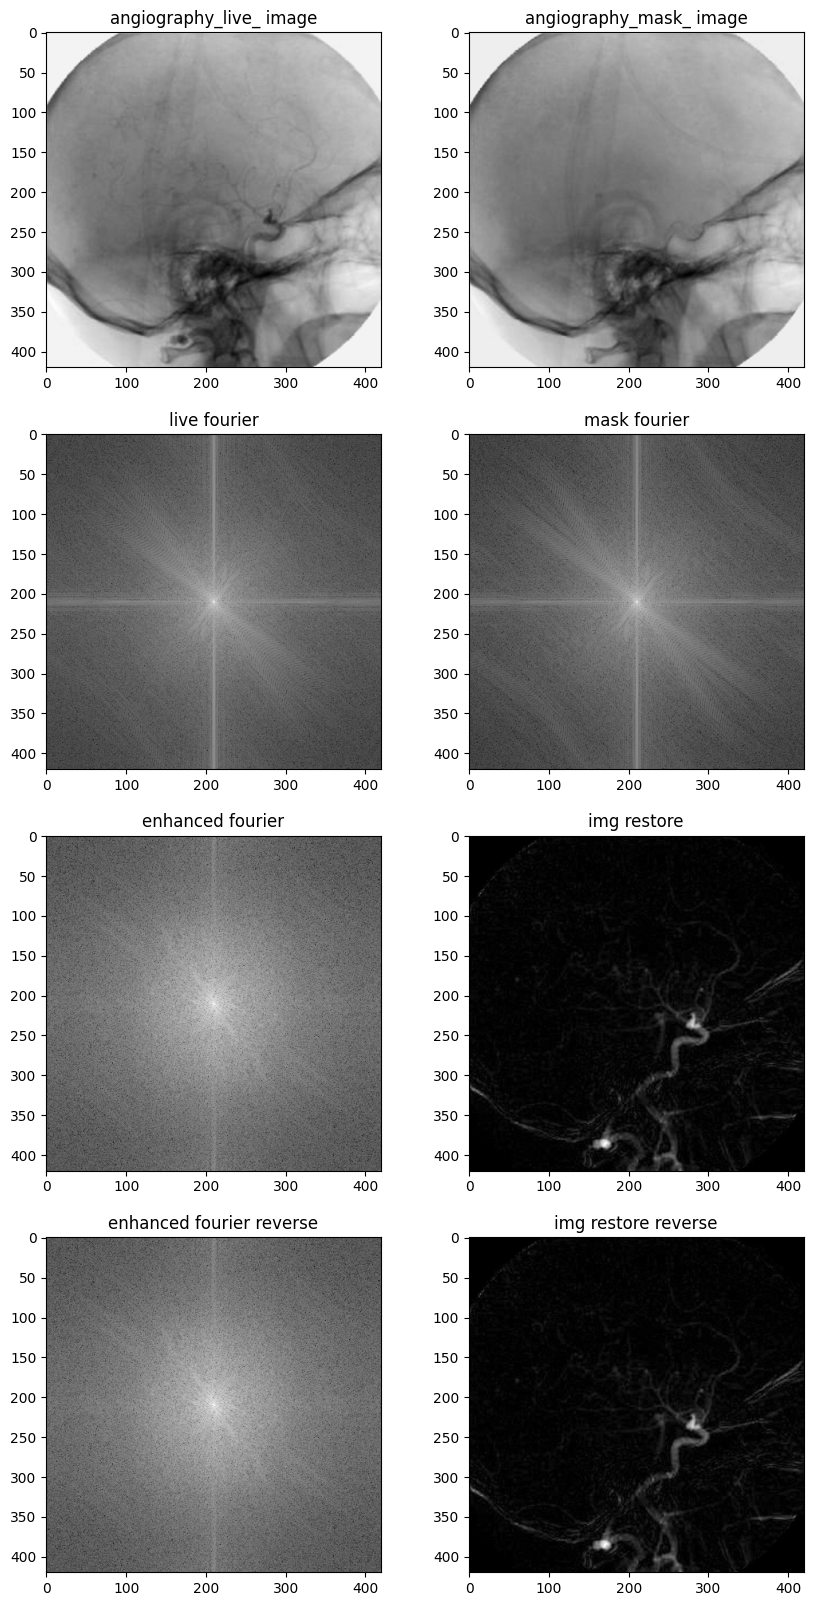

In [23]:
# 傅立叶变换 相应操作
# 得到频域上的图像，其幅值、相位
# 变换再逆变换得到原图
%reset -f
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
%clear
img1 = cv2.imread('angiography_live_ image.tif', 0)  # 直接读为灰度图像
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
c1 = np.log(np.abs(f1))  # 频域后图像的振幅信息
c2 = np.log(np.abs(fshift1))  # 中心化操作

img2 = cv2.imread('angiography_mask_image.tif', 0)  # 直接读为灰度图像
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
c3 = np.log(np.abs(f2))  # 频域后图像的振幅信息
c4 = np.log(np.abs(fshift2))  # 中心化操作

# 逆变换
c5 = np.log(np.abs(fshift1-fshift2))  # 滤波操作
f0shift = np.fft.ifftshift(fshift1-fshift2)
img_back0 = np.fft.ifft2(f0shift)
img_back_abs0 = np.abs(img_back0)  # 出来的是复数，无法显示

# 逆变换
c6 = np.log(np.abs(-fshift1+fshift2))  # 滤波操作
f1shift = np.fft.ifftshift(-fshift1+fshift2)
img_back1 = np.fft.ifft2(f1shift)
img_back_abs1 = np.abs(img_back1)  # 出来的是复数，无法显示

plt.figure(figsize=(10,20))
plt.subplot(421), plt.imshow(img1, 'gray'), plt.title('angiography_live_ image')
plt.subplot(422), plt.imshow(img2, 'gray'), plt.title('angiography_mask_ image')
plt.subplot(423), plt.imshow(c2, 'gray'), plt.title('live fourier')
plt.subplot(424), plt.imshow(c4, 'gray'), plt.title('mask fourier')
plt.subplot(425), plt.imshow(c5, 'gray'), plt.title('enhanced fourier')
plt.subplot(426), plt.imshow(img_back_abs0, 'gray'), plt.title('img restore')
plt.subplot(427), plt.imshow(c6, 'gray'), plt.title('enhanced fourier reverse')
plt.subplot(428), plt.imshow(img_back_abs1, 'gray'), plt.title('img restore reverse')
plt.show()

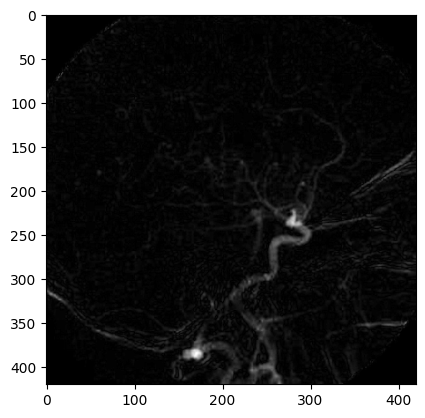

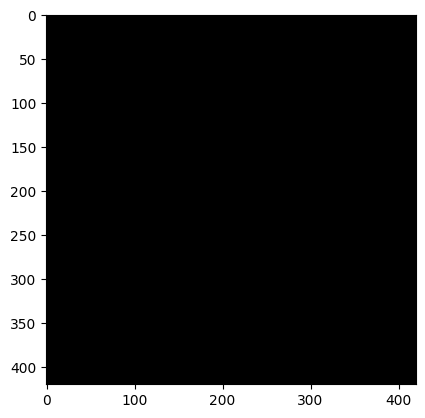

In [27]:
img_difference=img_back0-img_back1
plt.figure()
plt.imshow(np.abs(img_difference),'gray')

img_difference=img_back0+img_back1
plt.figure()
plt.imshow(np.abs(img_difference),'gray')
plt.show()

In the part above, reversing the order of substraction brings no differences. That is because reverse in fourier domain causes complex conjugate in time domain.

<b><font size=5>PROBLEM3 2.9</font></b>

(a)(b)

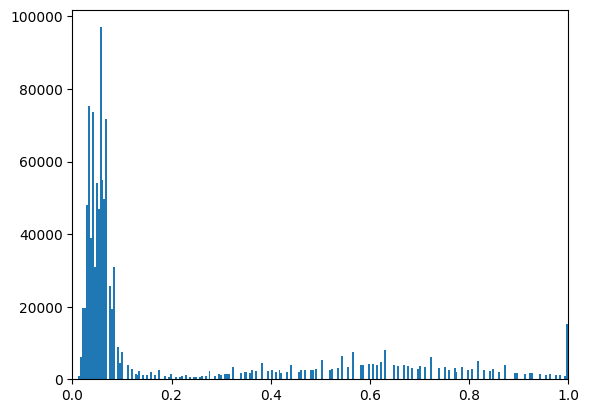

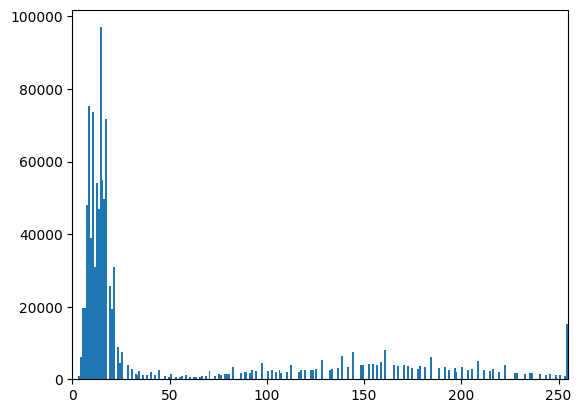

In [38]:
import matplotlib.pyplot as plt
import cv2
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

def imageHist4e(f,mode='n'):
    if mode=='n':
        # calculate mean value from RGB channels and flatten to 1D array
        vals = f.mean(axis=2).flatten()
        # plot histogram with 255 bins
        b, bins, patches = plt.hist(normalization(vals), bins=255)
        plt.xlim([0,1])
        plt.show()
    else:
        # calculate mean value from RGB channels and flatten to 1D array
        vals = f.mean(axis=2).flatten()
        # plot histogram with 255 bins
        b, bins, patches = plt.hist(vals, bins=255)
        plt.xlim([0,255])
        plt.show()

im = cv2.imread('rose1024.tif')
imageHist4e(im,'n')
imageHist4e(im,'u')

(c)

Main part of the picture is dark, with an gray intensity of lower than 50.

<b><font size=5>PROBLEM4 2.10</font></b>

(a)

In [42]:
import numpy as np

def centralMoments4e(f, n):
    # Normalize the image intensities to [0, 1] if necessary
    if np.max(f) > 1:
        f = f / 255.0
    
    # Calculate the histogram of the image
    hist, _ = np.histogram(f, bins=256, range=(0, 1))
    hist = hist / np.sum(hist)  # Normalize the histogram to make it a probability distribution

    # Calculate the mean (u(1))
    mean = np.sum(np.arange(256) * hist)
    # Initialize an array to store central moments
    central_moments = np.zeros(n)
    # Calculate higher-order central moments (u(3) and above)
    central_moments[0]=mean
    for k in range(1, n):
        central_moments[k] = np.sum(((np.arange(256) - mean) ** (k+1)) * hist)
    return central_moments

(b)

central moments: [4.67893534e+01 4.36975665e+03 5.03521531e+05 8.94575143e+07]


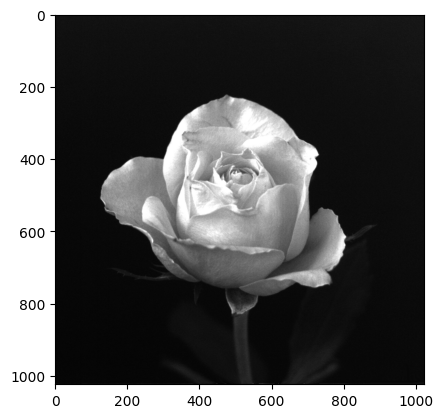

In [49]:
# Example usage:
im = cv2.imread('rose1024.tif')
central_moments = centralMoments4e(im, 4)
print('central moments:',central_moments)
plt.imshow(im)
plt.show()

(c)

central moments: [1.29305867e+02 1.85636390e+03 1.50091721e+04 1.02774390e+07]


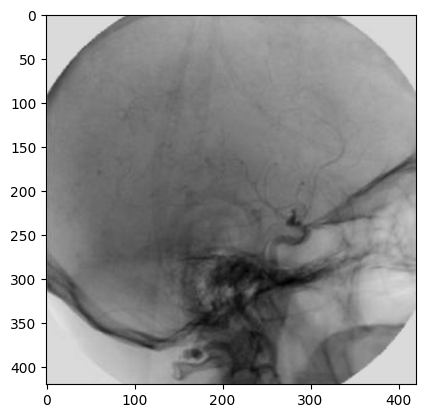

In [50]:
# Example usage:
im = cv2.imread('angiography_live_ image.tif')
central_moments = centralMoments4e(im, 4)
print('central moments:',central_moments)
plt.imshow(im)
plt.show()

(d)

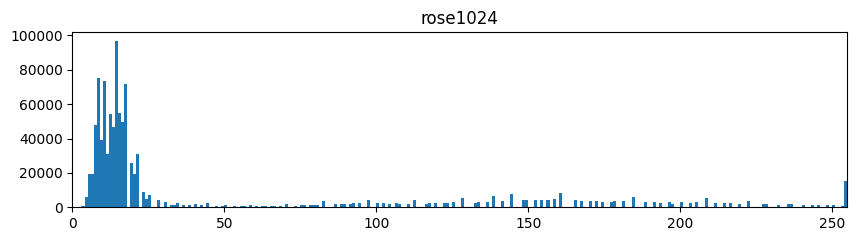

[4.67893534e+01 4.36975665e+03 5.03521531e+05 8.94575143e+07]


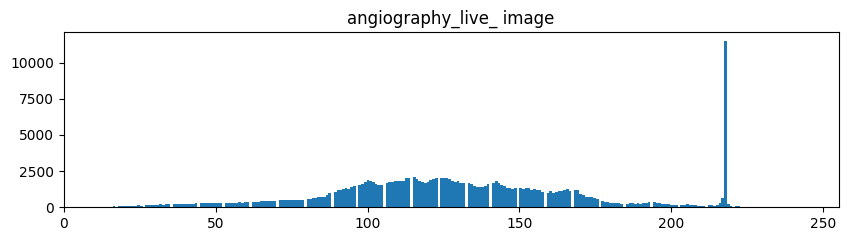

[1.29305867e+02 1.85636390e+03 1.50091721e+04 1.02774390e+07]


In [80]:
plt.figure(figsize=(10,5))

im = cv2.imread('rose1024.tif')
plt.subplot(211)
plt.title('rose1024')
imageHist4e(im,'u')
print(centralMoments4e(im, 4))

plt.figure(figsize=(10,5))
im = cv2.imread('angiography_live_ image.tif')
plt.subplot(212)
plt.title('angiography_live_ image')
imageHist4e(im,'u')
print(centralMoments4e(im, 4))

plt.show()

(e)

It is shown that mean value match the center of the value in the histogram. The rose picture is more dispersed, with larger center values.